<a href="https://colab.research.google.com/github/Vensery/data-campaign-2122/blob/main/Mnist.elm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import gzip
with gzip.open('/content/drive/MyDrive/train-images-idx3-ubyte.gz')as input_data:
  mnist=input_data.read()

In [34]:
!cp /content/drive/MyDrive/elm.py /content 

In [35]:
import elm
import tensorflow as tf
import numpy as np
import matplotlib. pyplot as plt

In [36]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [37]:
# transform the 3D data becomes 2D data
x_train,x_test=np.reshape(x_train,(60000,28*28)),np.reshape(x_test,(10000,28*28))
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (60000, 784)
shape of x_test:  (10000, 784)


In [38]:
# built model and train
model = elm.elm(hidden_units=3500, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('no_re')

In [39]:
# test accuracy
print("classifier train accuracy:%f" % train_accuracy)
print('classifier running time:', running_time)

classifier train accuracy:0.977333
classifier running time: 451.4809180000002


In [40]:
 # test
prediction = model.predict(x_test)
print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

classifier test prediction: [7 2 1 ... 4 5 6]
classifier test accuracy: 0.9658


In [41]:
from sklearn.model_selection import KFold
n_split=10
# number of divisions
result_accur=[];
kfold = KFold(n_splits=n_split, shuffle=True)
for train, test in kfold.split(x_train, y_train):
     
    beta, train_accuracy, running_time = model.fit('no_re')
    scores=model.score(x=x_train[test],y=y_train[test])
    # Increase fold number
    result_accur.append(scores);
a = ("%.4f" % np.mean(result_accur))
print(f"average accuracy：{a}")

average accuracy：0.9773


In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
title="Confusion Matrix",
cmap = plt.cm.bone_r):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment = 'center',
               color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix without normalization
[[ 968    0    1    0    0    2    5    1    2    1]
 [   0 1123    3    1    1    1    4    0    2    0]
 [   6    0  990    7    3    0    4    9   12    1]
 [   0    0    7  969    0   15    1    8    7    3]
 [   1    1    3    0  954    0    6    0    2   15]
 [   4    0    1   11    2  852    8    3    8    3]
 [   8    3    1    0    5    2  938    0    1    0]
 [   0   10   13    2    5    0    0  979    3   16]
 [   5    0    2    7   11    1    5    3  936    4]
 [   6    5    2    8   17    9    1    6    6  949]]


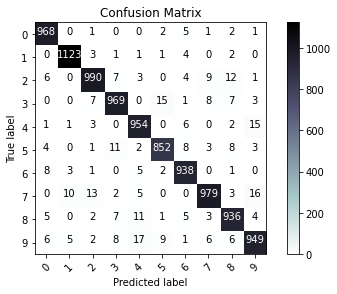

In [43]:
p_test = model.predict(x_test)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [44]:
# training matrix plot
def plot_confusion_matrix(cm, classes,
                          normalize = False,
title="Confusion Matrix",
cmap = plt.cm.bone_r):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment = 'center',
               color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix without normalization
[[5869    2    3    2    3    3   19    1   18    3]
 [   1 6663   32    2   15    0    2   14    9    4]
 [  17   11 5812   15   17    2    5   32   43    4]
 [   4    5   45 5934    4   38    6   27   45   23]
 [   3   20    7    0 5710    1   18    5    6   72]
 [  13    3    7   38   10 5276   37    4   19   14]
 [  15    8    3    1    4   27 5848    0   12    0]
 [   3   31   30    5   23    2    2 6113    7   49]
 [   7   21   19   20   13   24   19    5 5701   22]
 [  15    6    7   48   59   21    2   50   27 5714]]


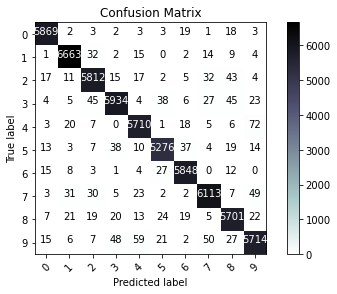

In [45]:
p_train = model.predict(x_train)
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, list(range(10)))